<a href="https://colab.research.google.com/github/swaroopkasaraneni/AI/blob/main/AICertification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Read the training using pandas module and select only the sentiment and text columns
2. Observe randomly generated 10 tweets for each sentimentwith respect to the following:
 1. Text contains references with ‘@’
 2. Text contains links (http , https )
 3. Text contains punctuations
 4. Text contains Emoticons



In [5]:
import pandas as pd
import random
import re


df = pd.read_csv("/content/Tweets-train.csv")
df = df[['airline_sentiment', 'text']]

# Group by sentiment and sample 10 tweets for each sentiment
sentiment_samples = {}
for sentiment in df['airline_sentiment'].unique():
  sentiment_samples[sentiment] = df[df['airline_sentiment'] == sentiment].sample(10, random_state=42)['text'].tolist()

# Analyze each tweet for the specified characteristics
results = []
for sentiment, tweets in sentiment_samples.items():
  print(f"\nSentiment: {sentiment}")
  for tweet in tweets:
    has_reference = bool(re.search(r"@\w+", tweet))
    has_link = bool(re.search(r"http[s]?://", tweet))
    has_punctuation = bool(re.search(r"[^\w\s]", tweet))
    has_emoticon = bool(re.search(r":[\)\(DPpOo]", tweet))  # Basic emoticon patterns

    results.append({
        'Tweet': tweet,
        'Contains Reference (@)': has_reference,
        'Contains Link (http/https)': has_link,
        'Contains Punctuation': has_punctuation,
        'Contains Emoticon': has_emoticon
    })

    print(f"Tweet: {tweet}")
    print(f"Contains Reference (@): {has_reference}")
    print(f"Contains Link (http/https): {has_link}")
    print(f"Contains Punctuation: {has_punctuation}")
    print(f"Contains Emoticon: {has_emoticon}")
    print("-" * 50)







Sentiment: positive
Tweet: @united I just received notification of in-flight Wi-Fi for UA863 from @flySFO to @SydneyAirport. Amazing!
Contains Reference (@): True
Contains Link (http/https): False
Contains Punctuation: True
Contains Emoticon: False
--------------------------------------------------
Tweet: @JetBlue today my family gets to experience #mosaic status w/ me! #LifeIsGood
Contains Reference (@): True
Contains Link (http/https): False
Contains Punctuation: True
Contains Emoticon: False
--------------------------------------------------
Tweet: @SouthwestAir A+ to the Safety Dos and Don'ts Announcer. Flight 651 from Midway (MDW) to Pittsburgh (PIT)!
Contains Reference (@): True
Contains Link (http/https): False
Contains Punctuation: True
Contains Emoticon: False
--------------------------------------------------
Tweet: @USAirways we called and were able to get rescheduled. Thank you for the quick responses today!!
Contains Reference (@): True
Contains Link (http/https): False
C

3. You have to prepare a function to clean all the above observed tokens from the tweet text.Save changes in a new column




In [6]:
import pandas as pd
import re
from collections import Counter

def clean_text(text):
    # Remove references (@username)
    text = re.sub(r"@\w+", "", text)
    # Remove links (http://, https://)
    text = re.sub(r"http[s]?://\S+", "", text)
    # Remove punctuation
    text = re.sub(r"[^\w\s]", "", text)
    # Remove emoticons (simple emoticons like :) :( :D)
    text = re.sub(r":[\)\(DdpOo]", "", text)
    # Convert to lowercase to standardize
    text = text.lower()
    return text

df = df[['airline_sentiment', 'text']]
df['Cleaned-Text'] = df['text'].apply(clean_text)


4. List down the most common 15 words for each sentiment. Observe the results

In [7]:
sentiment_words = {}
for sentiment in df['airline_sentiment'].unique():
    sentiment_data = df[df['airline_sentiment'] == sentiment]
    # Tokenize the cleaned text into words
    words = ' '.join(sentiment_data['Cleaned-Text']).split()
    # Count word frequencies
    word_counts = Counter(words)
    # Get the 15 most common words
    common_words = word_counts.most_common(15)
    sentiment_words[sentiment] = common_words

# Display the most common words for each sentiment
for sentiment, common_words in sentiment_words.items():
    print(f"\nMost common 15 words for sentiment: {sentiment}")
    for word, count in common_words:
        print(f"{word}: {count}")

# Save the updated DataFrame with cleaned text in a new CSV file
df.to_csv("Cleaned_Tweets.csv", index=False)
print("\nCleaned tweets have been saved in 'Cleaned_Tweets.csv'.")


Most common 15 words for sentiment: positive
the: 689
to: 675
you: 632
for: 493
i: 449
thanks: 446
a: 372
thank: 335
and: 304
my: 262
flight: 261
in: 236
on: 233
your: 186
it: 184

Most common 15 words for sentiment: neutral
to: 1184
i: 843
the: 729
a: 588
you: 530
on: 472
for: 442
flight: 422
my: 387
is: 371
in: 344
and: 328
can: 300
it: 255
of: 245

Most common 15 words for sentiment: negative
to: 4318
the: 3014
i: 2605
a: 2300
flight: 2070
and: 2039
on: 2005
for: 1996
you: 1806
my: 1718
is: 1525
in: 1254
of: 1137
me: 987
your: 986

Cleaned tweets have been saved in 'Cleaned_Tweets.csv'.


5. Remove Stopwords from all the tweets.Save changes in a new column and list down most common 15 words


In [8]:
import pandas as pd
import re
import nltk
from collections import Counter
from nltk.corpus import stopwords

nltk.download('stopwords')
df = df[['airline_sentiment', 'text']]
# List of stopwords
stop_words = set(stopwords.words('english'))

# Function to clean tweet text
def clean_text(text):
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"http[s]?://\S+", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r":[\)\(DdpOo]", "", text)
    text = text.lower()
    # Remove stopwords
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

# Clean the text column and save it in a new column 'Cleaned-Text'
df['Cleaned-Text'] = df['text'].apply(clean_text)

# List most common 15 words for each sentiment
sentiment_words = {}
for sentiment in df['airline_sentiment'].unique():
    sentiment_data = df[df['airline_sentiment'] == sentiment]

    # Tokenize the cleaned text into words
    words = ' '.join(sentiment_data['Cleaned-Text']).split()

    # Count word frequencies
    word_counts = Counter(words)

    # Get the 15 most common words
    common_words = word_counts.most_common(15)

    sentiment_words[sentiment] = common_words

# Display the most common words for each sentiment
for sentiment, common_words in sentiment_words.items():
    print(f"\nMost common 15 words for sentiment: {sentiment}")
    for word, count in common_words:
        print(f"{word}: {count}")

# Save the updated DataFrame with cleaned text in a new CSV file
df.to_csv("Cleaned_Tweets_NoStopwords.csv", index=False)
print("\nCleaned tweets without stopwords have been saved in 'Cleaned_Tweets_NoStopwords.csv'.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



Most common 15 words for sentiment: positive
thanks: 446
thank: 335
flight: 261
great: 162
service: 119
love: 97
best: 85
customer: 85
good: 81
guys: 81
much: 77
get: 76
awesome: 70
got: 70
amazing: 63

Most common 15 words for sentiment: neutral
flight: 422
get: 173
please: 130
flights: 128
help: 118
need: 113
thanks: 113
im: 106
would: 92
dm: 82
time: 76
cancelled: 74
know: 72
tomorrow: 72
us: 70

Most common 15 words for sentiment: negative
flight: 2070
get: 721
cancelled: 644
service: 523
hours: 492
help: 437
customer: 420
hold: 417
time: 415
2: 415
im: 398
plane: 378
delayed: 361
still: 353
us: 352

Cleaned tweets without stopwords have been saved in 'Cleaned_Tweets_NoStopwords.csv'.


6. Remove these words from all the tweets.

americanair,united,delta,southwestair,jetblue,virginamerica,usairways,flight,planeSave changes in a new column and list down most common 15 words.Comment your observations

In [9]:
import pandas as pd
import re
from collections import Counter
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

df = df[['airline_sentiment', 'text']]
stop_words = set(stopwords.words('english'))
remove_words = ['americanair', 'united', 'delta', 'southwestair', 'jetblue', 'virginamerica', 'usairways', 'flight', 'plane']

def clean_text(text):
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"http[s]?://\S+", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r":[\)\(DdpOo]", "", text)
    text = text.lower()
    text = " ".join([word for word in text.split() if word not in stop_words])
    text = " ".join([word for word in text.split() if word not in remove_words])
    return text

df['Cleaned-Text'] = df['text'].apply(clean_text)

# List most common 15 words for each sentiment
sentiment_words = {}
for sentiment in df['airline_sentiment'].unique():
    sentiment_data = df[df['airline_sentiment'] == sentiment]
    words = ' '.join(sentiment_data['Cleaned-Text']).split()
    word_counts = Counter(words)
    common_words = word_counts.most_common(15)
    sentiment_words[sentiment] = common_words

for sentiment, common_words in sentiment_words.items():
    print(f"\nMost common 15 words for sentiment: {sentiment}")
    for word, count in common_words:
        print(f"{word}: {count}")

# Save the updated DataFrame with cleaned text in a new CSV file
df.to_csv("Cleaned_Tweets_NoSpecificWords.csv", index=False)
print("\nCleaned tweets without specific words have been saved in 'Cleaned_Tweets_NoSpecificWords.csv'.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Most common 15 words for sentiment: positive
thanks: 446
thank: 335
great: 162
service: 119
love: 97
best: 85
customer: 85
good: 81
guys: 81
much: 77
get: 76
awesome: 70
got: 70
amazing: 63
help: 63

Most common 15 words for sentiment: neutral
get: 173
please: 130
flights: 128
help: 118
need: 113
thanks: 113
im: 106
would: 92
dm: 82
time: 76
cancelled: 74
know: 72
tomorrow: 72
us: 70
fleek: 70

Most common 15 words for sentiment: negative
get: 721
cancelled: 644
service: 523
hours: 492
help: 437
customer: 420
hold: 417
time: 415
2: 415
im: 398
delayed: 361
still: 353
us: 352
amp: 350
cant: 348

Cleaned tweets without specific words have been saved in 'Cleaned_Tweets_NoSpecificWords.csv'.



7. Encode Sentiments using Label Encoder
8. Vectorize the Text Column (You can choose any vectorizer of your choice)


In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
import nltk

nltk.download('stopwords')
df = df[['airline_sentiment', 'text']]

label_encoder = LabelEncoder()
df['Sentiment-Encoded'] = label_encoder.fit_transform(df['airline_sentiment'])

print("Sentiment Encoding (First 5 rows):")
print(df[['airline_sentiment', 'Sentiment-Encoded']].head())

# 2. Text Vectorization using CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['text'])

print("\nVectorized Text (First 5 rows of the vectorized output):")
print(X.toarray()[:5])

vectorized_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print("\nFirst 5 rows of the vectorized text as DataFrame:")
print(vectorized_df.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sentiment Encoding (First 5 rows):
  airline_sentiment  Sentiment-Encoded
0          positive                  2
1           neutral                  1
2          negative                  0
3          negative                  0
4          positive                  2

Vectorized Text (First 5 rows of the vectorized output):
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

First 5 rows of the vectorized text as DataFrame:
   000  10  100  11  12  15  16  17  18  19  ...  wsj  wtf  yall  yeah  year  \
0    0   0    0   0   0   0   0   0   0   0  ...    0    0     0     0     0   
1    0   0    0   0   0   0   0   0   0   0  ...    0    0     0     0     0   
2    0   0    0   0   0   0   0   0   0   0  ...    0    0     0     0     0   
3    0   0    0   0   0   0   0   0   0   0  ...    0    0     0     0     0   
4    0   0    0   0   0   0   0   0   0   0  ...    0    0     0     0     0   

   years  yes  yesterday  yr  zero  
0      0

9. Prepare a multiclass Classification model using any classification algorithmand create a model
10. Read the test data and carry our data cleaning, encoding and vectorising operations on the test data
11. Predict the sentiments for test data
12. Print and explain the Confusion Matrix
13. Compute Accuracy of your model

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Confusion Matrix:
[[2251  193   64]
 [ 289  489   73]
 [ 135   82  424]]

Accuracy: 79.10%


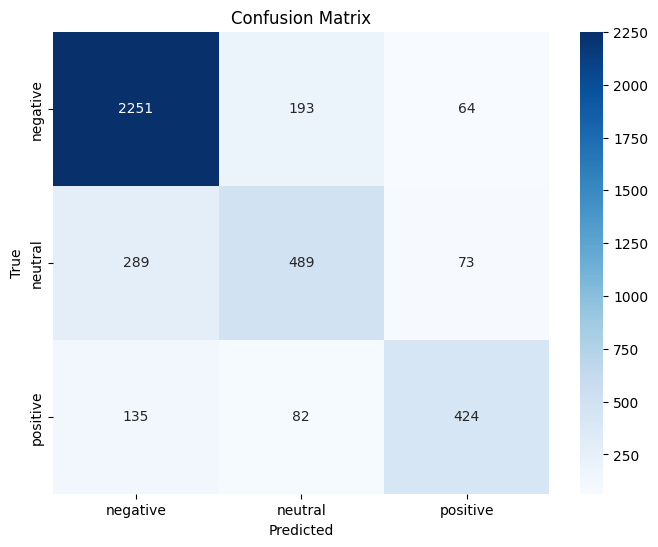

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

def clean_text(text):
    text = text.lower()
    # Remove punctuation and special characters
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    return text

def preprocess_data(df):
    # Clean the text data
    df['cleaned_text'] = df['text'].apply(clean_text)

    # Label Encoding for sentiments
    label_encoder = LabelEncoder()
    df['encoded_sentiment'] = label_encoder.fit_transform(df['airline_sentiment'])

    # Vectorize the cleaned text using CountVectorizer
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(df['cleaned_text'])
    y = df['encoded_sentiment']

    return X, y, vectorizer, label_encoder


def evaluate_model(model, X_test, y_test, label_encoder):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {accuracy * 100:.2f}%")

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

def sentiment_classification(train_file, test_file):
    train_df = pd.read_csv(train_file)
    test_df = pd.read_csv(test_file)

    X_train, y_train, vectorizer, label_encoder = preprocess_data(train_df)

    # Create and train the model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Preprocess test data (using the same vectorizer and label encoder)
    test_df['cleaned_text'] = test_df['text'].apply(clean_text)
    X_test = vectorizer.transform(test_df['cleaned_text'])
    y_test = label_encoder.transform(test_df['airline_sentiment'])

    # Evaluate the model on test data
    evaluate_model(model, X_test, y_test, label_encoder)

train_file = "/content/Tweets-train.csv"
test_file = "/content/Tweets-test.csv"
sentiment_classification(train_file, test_file)
